# TOC

 - [Simple Example](0-simple-example.ipynb)
 - [Simple Example Symbolic](1-simple-example-symblic.ipynb)
 - [Pythonic MOA Array Interface](2-lazy-arrays.ipynb)
 - [Benchmarks](3-benchmarks.ipynb)
 
# Benchmarks

Isn't performance the main reason we care about MOA?

In [1]:
from moa.frontend import LazyArray
from moa.array import Array

n = 1000
m = 1000

In [2]:
# A + B
expression = (LazyArray(name='A', shape=('n', 'm')) + LazyArray(name='B', shape=('n', 'm')))[0]

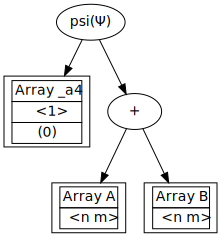

In [5]:
expression

In [6]:
exec(expression.compile(backend='python'))

A = Array(shape=(n, m), value=tuple(range(n*m)))
B = Array(shape=(n, m), value=tuple(range(n*m)))

## Naive Pure Python MOA

In [7]:
%%timeit

f(A=A, B=B)

5.41 ms ± 60.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Python MOA + Numba

really just @numba.jit + numpy.zeros

In [20]:
import numpy
import numba

exec(expression.compile(backend='python', use_numba=True))

A = numpy.arange(n*m).reshape((n, m))
B = numpy.arange(n*m).reshape((n, m))

In [21]:
%%timeit

f(A=A, B=B)

2.32 µs ± 40.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Naive Numpy

In [12]:
%%timeit

# lazy
(A + B)[0]

2.03 ms ± 57.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Optimized Numpy

In [13]:
%%timeit

# hand optimized
(A[0] + B[0])

1.7 µs ± 38.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Compilers are bad at math

In [22]:
@numba.jit
def g(A, B):
    return (A + B)[0]

In [23]:
%%timeit

g(A, B)

1.89 ms ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
